## Load Dataset

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()


## Preprocess

In [10]:
from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(digits.data , digits.target , test_size=0.25)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Calculate Metrics

In [20]:
from sklearn.metrics import accuracy_score,precision_score , recall_score
def calculate_metrics(y_train,y_test,y_pred_train,y_pred_test):
    acc_train = accuracy_score(y_true=y_train,y_pred=y_pred_train)
    acc_test = accuracy_score(y_true=y_test,y_pred=y_pred_test)
    precision= precision_score(y_true=y_test,y_pred=y_pred_test , average='weighted')
    recall = recall_score(y_true=y_test,y_pred=y_pred_test, average='weighted')
    print(f"accuracy train: {acc_train}   accuracy test: {acc_test}    precision: {precision}    recall: {recall}")
    return acc_train,acc_test,precision,recall

## Classification

1- Random Forest


In [67]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier( n_estimators= 4 , max_depth= 8 , min_samples_split=3)
random_forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=3, n_estimators=4)

In [68]:
y_pred_train = random_forest.predict(x_train)
y_pred_test = random_forest.predict(x_test)
acc_train_RF,acc_test_RF,precision_RF,recall_RF = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy train: 0.9732739420935412   accuracy test: 0.9044444444444445    precision: 0.9067964827893176    recall: 0.9044444444444445


2- SVM

In [42]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train,y_train)


SVC()

In [43]:
y_pred_train = svm.predict(x_train)
y_pred_test = svm.predict(x_test)
acc_train_SVM,acc_test_SVM,precision_SVM,recall_SVM = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy train: 0.9955456570155902   accuracy test: 0.9866666666666667    precision: 0.9872348872659432    recall: 0.9866666666666667


ANN

In [61]:
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes= 6)
ann.fit(x_train,y_train)

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=6)

In [62]:
y_pred_train = ann.predict(x_train)
y_pred_test = ann.predict(x_test)
acc_train_ANN,acc_test_ANN,precision_ANN,recall_ANN = calculate_metrics(y_train,y_test,y_pred_train,y_pred_test)

accuracy train: 0.8990348923533779   accuracy test: 0.8911111111111111    precision: 0.8936166264201979    recall: 0.8911111111111111


## Comparison

1- Train Accuracy

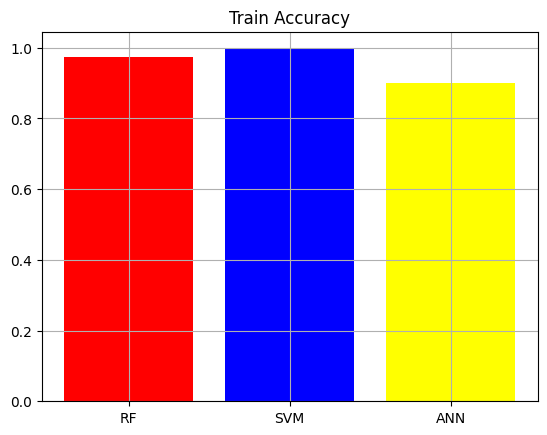

In [69]:
import matplotlib.pyplot as plt

acc_train = [acc_train_RF, acc_train_SVM,acc_train_ANN]
title = [ "RF" , "SVM" , "ANN"]
colors = ["red" , "blue" , "yellow"]
plt.bar(title,acc_train,color=colors)
plt.title("Train Accuracy")
plt.grid()
plt.show()

2- Test Accuracy

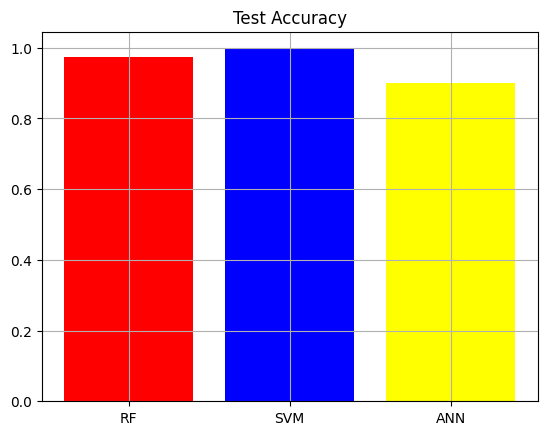

In [70]:
acc_test = [acc_train_RF, acc_train_SVM,acc_train_ANN]
title = [ "RF" , "SVM" , "ANN"]
colors = ["red" , "blue" , "yellow"]
plt.bar(title,acc_test,color=colors)
plt.title("Test Accuracy")
plt.grid()
plt.show()

3- Precision

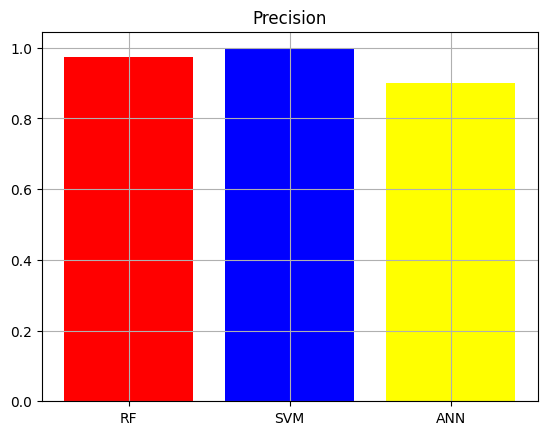

In [71]:
precision = [acc_train_RF, acc_train_SVM,acc_train_ANN]
title = [ "RF" , "SVM" , "ANN"]
colors = ["red" , "blue" , "yellow"]
plt.bar(title,precision,color=colors)
plt.title("Precision")
plt.grid()
plt.show()

4- Recall

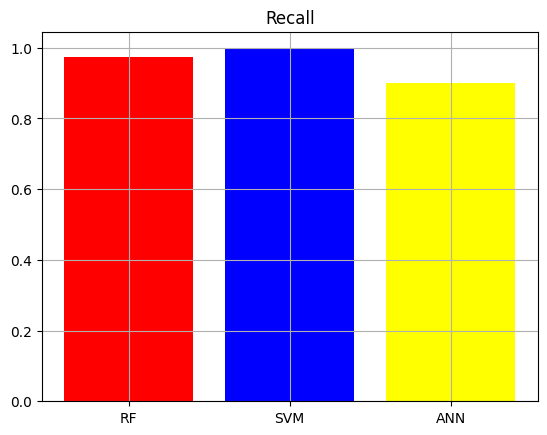

In [72]:
recall = [acc_train_RF, acc_train_SVM,acc_train_ANN]
title = [ "RF" , "SVM" , "ANN"]
colors = ["red" , "blue" , "yellow"]
plt.bar(title,recall,color=colors)
plt.title("Recall")
plt.grid()
plt.show()